# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

Step 1: Get the data

The dataset provided consists of various amounts of components used to describe factors that attribute to wildfires and the Reletive Humidity(RH).

Here is the data dictionary:

In [1]:
! python -m pip install scikit-learn
! python -m pip install category_encoders
! python -m pip install xgboost

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Read in data. I chose this dataset because fires are out of control and want to examine if wind and temperature have a correlating effect. *The dataset is based out of Portugal, not California.* Results may vary by geographic location.

In [56]:
df = pd.read_csv(r'C:\Users\bioni\OneDrive\Documents\GitHub\Coding_Temple\Week 4\Assignments\forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Step: 2
What needs to be done to this dataset?

* Are all columns the data type they need to be?
* Count of null values
* Visualization of the target variable

In [57]:
df.isnull().sum()
df.describe().round(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00
mean,4.67,4.30,90.64,110.87,547.94,9.02,18.89,44.29,4.02,0.02,12.85
std,2.31,1.23,5.52,64.05,248.07,4.56,5.81,16.32,1.79,0.30,63.66
min,1.00,2.00,18.70,1.10,7.90,0.00,2.20,15.00,0.40,0.00,0.00
25%,3.00,4.00,90.20,68.60,437.70,6.50,15.50,33.00,2.70,0.00,0.00
50%,4.00,4.00,91.60,108.30,664.20,8.40,19.30,42.00,4.00,0.00,0.52
75%,7.00,5.00,92.90,142.40,713.90,10.80,22.80,53.00,4.90,0.00,6.57
max,9.00,9.00,96.20,291.30,860.60,56.10,33.30,100.00,9.40,6.40,1090.84


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [76]:
df.drop(['month'], axis = 1, inplace = True)



In [77]:
df['wind'].describe().round(2)

count    517.00
mean       4.02
std        1.79
min        0.40
25%        2.70
50%        4.00
75%        4.90
max        9.40
Name: wind, dtype: float64

Create heatmap

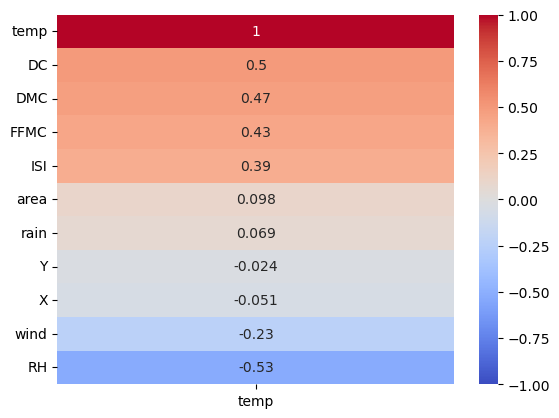

In [79]:
sns.heatmap(df.corr()[['temp']].sort_values(by='temp',ascending=False),
            annot=True,
            vmin = -1,
            vmax= 1,
            cmap='coolwarm'         
            );

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the `RH` column
- Heatmap of features related to `wind`
- A scatterplot of `rain` compared to `temp` colored orange with a title and axis labels


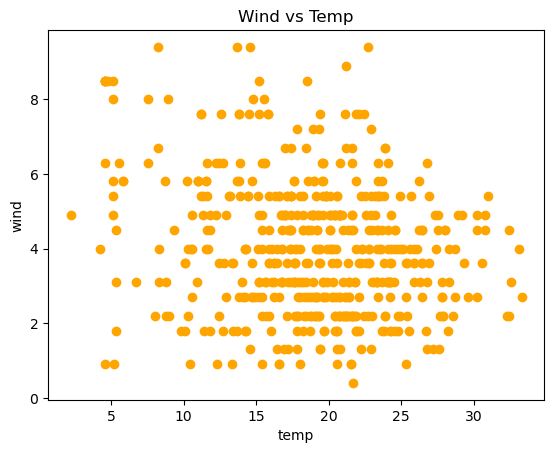

In [94]:
plt.scatter(df['temp'],
            df['wind'],
            color = 'orange'),
plt.title ('Wind vs Temp'),
plt.xlabel('temp'),
plt.ylabel('wind');

## Part 4: Modeling

**Fit a linear regression model to predict the wildfires.**
* Please use a random state of `42` when splitting your data
* Use 80% of the dataset for training and the other 20% for testing
* Print out and interpret the testing R<sup>2</sup>.

In [95]:
# Split data into X and y
X = df.drop(columns= 'wind')
y = df['wind']

In [96]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [97]:
# Shapes
print(X_test.shape)
print(y_test.shape)

(104, 10)
(104,)


In [98]:
print(X_train.shape)
print(y_train.shape)

(413, 10)
(413,)


In [99]:
#Step 1 - instantiate an Encoder
ohe = OneHotEncoder(use_cat_names= True)

#Step 2: Fit the Encoder
ohe.fit(X_train, y_train)

#Step 3: Transform the data
X_transformed = ohe.transform(X_train)
X_transformed

,X,Y,FFMC,DMC,DC,ISI,temp,RH,rain,area
329,4,3,92.2,102.3,751.5,8.4,23.5,27,0.0,3.33
173,4,4,90.9,126.5,686.5,7.0,17.7,39,0.0,3.07
272,2,5,92.1,152.6,658.2,14.3,20.2,47,0.0,3.09
497,3,4,96.1,181.1,671.2,14.3,32.3,27,0.0,14.68
182,5,4,86.8,15.6,48.3,3.9,12.4,53,0.0,6.38
...,...,...,...,...,...,...,...,...,...,...
71,4,5,94.3,85.1,692.3,15.9,17.7,37,0.0,0.00
106,4,5,91.4,30.7,74.3,7.5,18.2,29,0.0,0.00
270,2,2,92.1,152.6,658.2,14.3,21.8,56,0.0,0.52
435,2,5,90.8,84.7,376.6,5.6,23.8,51,0.0,0.00


In [100]:
# Instantiate our model
lr= LinearRegression()

In [101]:
# Fit it to our training set!

# All numeric  -- do not need encoder!
# No null values -- do not need imputer!

lr.fit(X_train, y_train)

LinearRegression()

In [102]:
# Training Score
lr.score(X_train,y_train)

0.13844812246082316

In [103]:
# Test Score
lr.score(X_test, y_test)

0.018378939071383216

In [104]:
# Test Score
lr.score(X_test, y_test)

0.018378939071383216

In [105]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(0, len(X.columns))]

['X: 0.03204289697784921',
 'Y: -0.08989874134809225',
 'FFMC: -0.025917068766631766',
 'DMC: 0.003219871623621136',
 'DC: -0.001317504924664188',
 'ISI: 0.14352204587920625',
 'temp: -0.10331461426781116',
 'RH: -0.009062824981671444',
 'rain: 0.288481464709747',
 'area: 0.0011481922684355673']

Conclusion:

Wind and temperature do not show a strong correlation to determining wildfires in Portugal. In fact, the correlation is very weak = ~1.8%. Meaning, for every increase in temp and wind, there isn't enough correlation to state that there will be a wildfire caused.